In [1]:
import pandas as pd
import numpy as np

In [4]:
df1 = pd.DataFrame({'A':[1,2,3,4], 'B':[2,3,4, 5], 'C':[3,4, 5, 6]})
df2 = pd.DataFrame({'A':[1,2,3,4], 'B':[2,3,4, 5], 'D':[4, 5, 6, 7]})

In [5]:
df1

,A,B,C
0,1,2,3
1,2,3,4
2,3,4,5
3,4,5,6


In [6]:
df2

,A,B,D
0,1,2,4
1,2,3,5
2,3,4,6
3,4,5,7


In [7]:
df_ = df1.append(df2)
df_

,A,B,C,D
0,1,2,3.0,NaN
1,2,3,4.0,NaN
2,3,4,5.0,NaN
3,4,5,6.0,NaN
0,1,2,NaN,4.0
1,2,3,NaN,5.0
2,3,4,NaN,6.0
3,4,5,NaN,7.0


In [12]:
df_.reset_index().drop('index', axis=1)

,A,B,C,D
0,1,2,3.0,NaN
1,2,3,4.0,NaN
2,3,4,5.0,NaN
3,4,5,6.0,NaN
4,1,2,NaN,4.0
5,2,3,NaN,5.0
6,3,4,NaN,6.0
7,4,5,NaN,7.0


In [13]:
df_.reset_index(drop='True')

,A,B,C,D
0,1,2,3.0,NaN
1,2,3,4.0,NaN
2,3,4,5.0,NaN
3,4,5,6.0,NaN
4,1,2,NaN,4.0
5,2,3,NaN,5.0
6,3,4,NaN,6.0
7,4,5,NaN,7.0


### Joining Dataframes

In [14]:
pd.merge(df1, df2, how='inner', on='A')

,A,B_x,C,B_y,D
0,1,2,3,2,4
1,2,3,4,3,5
2,3,4,5,4,6
3,4,5,6,5,7


In [15]:
pd.merge(df1, df2, how='left', on='A')

,A,B_x,C,B_y,D
0,1,2,3,2,4
1,2,3,4,3,5
2,3,4,5,4,6
3,4,5,6,5,7


In [16]:
pd.merge(df1, df2, how='left', on=['A', 'B'])

,A,B,C,D
0,1,2,3,4
1,2,3,4,5
2,3,4,5,6
3,4,5,6,7


#### Joining by join()

In [31]:
df1.join(df2, lsuffix='_caller', rsuffix='_other', on=['A'])

,A_caller,B_caller,C,A_other,B_other,D
0,1,2,3,2.0,3.0,5.0
1,2,3,4,3.0,4.0,6.0
2,3,4,5,4.0,5.0,7.0
3,4,5,6,NaN,NaN,NaN


In [26]:
df1.index

RangeIndex(start=0, stop=4, step=1)

In [27]:
df2.index

RangeIndex(start=0, stop=4, step=1)

In [23]:
df_churn=pd.read_excel(r'E:\Fad\data mining\sem2\practices\dataset\Telco - churn.xls')

In [25]:
df_churn.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,confer,ebill,loglong,logtoll,logequi,logcard,logwire,lninc,custcat,churn
0,2,13,44,1,9,64,4,5,0,0,...,0,0,1.308333,NaN,NaN,2.014903,NaN,4.158883,1,1
1,3,11,33,1,7,136,5,5,0,0,...,1,0,1.481605,3.032546,NaN,2.724580,3.575151,4.912655,4,1
2,3,68,52,1,24,116,1,29,0,1,...,1,0,2.898671,2.890372,NaN,3.409496,NaN,4.753590,3,0
3,2,33,33,0,12,33,2,0,0,1,...,0,0,2.246015,NaN,NaN,NaN,NaN,3.496508,1,1
4,2,23,30,1,9,30,1,2,0,0,...,1,0,1.840550,NaN,NaN,NaN,NaN,3.401197,3,0


### Find average income and maximum age of each education degree (shown in ed field)!

In [35]:
df_g = df_churn.groupby('ed').agg({'income':np.mean, 'age':np.max})
# The keys in dictionary in agg() must be one of the fields of the dataframe
df_g

,income,age
ed,,
1,60.352941,77
2,68.714286,75
3,86.961722,76
4,89.418803,76
5,97.015152,63


In [36]:
df_g.rename(columns={'income':'income_mean', 'age':'age_max'}, inplace=True)

In [37]:
df_g

,income_mean,age_max
ed,,
1,60.352941,77
2,68.714286,75
3,86.961722,76
4,89.418803,76
5,97.015152,63


#### groubby on multiple fields and complex index

In [41]:
df_churn.groupby(['ed', 'gender']).agg({'income':np.mean, 'age':np.max, 'ed':np.count_nonzero})

income  age   ed
ed gender                      
1  0        51.700935   76  107
   1        69.896907   77   97
2  0        70.328358   72  134
   1        67.300654   75  153
3  0        91.433333   69   90
   1        83.579832   76  119
4  0        77.932773   62  119
   1       101.304348   76  115
5  0        88.515152   63   33
   1       105.515152   61   33

In [43]:
df_g2 = df_churn.groupby(['ed', 'gender']).agg({'age':np.mean, 'income':np.max, 'ed':len})
df_g2

age  income   ed
ed gender                        
1  0       45.514019     345  107
   1       45.649485     361   97
2  0       42.552239    1131  134
   1       41.568627     380  153
3  0       39.844444     928   90
   1       40.773109     732  119
4  0       39.226891     508  119
   1       39.434783    1668  115
5  0       41.787879     333   33
   1       39.515152     944   33

In [45]:
df_g2.index.get_level_values('ed')

Int64Index([1, 1, 2, 2, 3, 3, 4, 4, 5, 5], dtype='int64', name='ed')

In [47]:
df_g2.iloc[(df_g2.index.get_level_values('ed')==3) & (df_g2.index.get_level_values('gender')==1)]

,,age,income,ed
ed,gender,,,
3,1,40.773109,732,119


In [53]:
df_churn.groupby(['gender', 'retire']).agg({'age':len}).rename(columns={'age':'count'})

count
gender retire       
0      0         466
       1          17
1      0         487
       1          30

In [54]:
df_churn.groupby(['gender', 'retire']).agg({'age':len}).rename(columns={'age':'count'}).reset_index()

,gender,retire,count
0,0,0,466
1,0,1,17
2,1,0,487
3,1,1,30


### Practice question: Find churn percentage in each region 

In [48]:
df_churn.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,confer,ebill,loglong,logtoll,logequi,logcard,logwire,lninc,custcat,churn
0,2,13,44,1,9,64,4,5,0,0,...,0,0,1.308333,NaN,NaN,2.014903,NaN,4.158883,1,1
1,3,11,33,1,7,136,5,5,0,0,...,1,0,1.481605,3.032546,NaN,2.724580,3.575151,4.912655,4,1
2,3,68,52,1,24,116,1,29,0,1,...,1,0,2.898671,2.890372,NaN,3.409496,NaN,4.753590,3,0
3,2,33,33,0,12,33,2,0,0,1,...,0,0,2.246015,NaN,NaN,NaN,NaN,3.496508,1,1
4,2,23,30,1,9,30,1,2,0,0,...,1,0,1.840550,NaN,NaN,NaN,NaN,3.401197,3,0


In [51]:
df_churn.groupby('region').agg({'churn': np.mean}).rename(columns = {'churn':'average_churn_rate'}).reset_index()

,region,average_churn_rate
0,1,0.279503
1,2,0.281437
2,3,0.261628


### Applying different aggregations on the same field

In [55]:
a = df_churn.groupby('region').agg({'age':np.max}).rename(columns={'age':'max_age'})
b = df_churn.groupby('region').agg({'age':np.min}).rename(columns={'age':'min_age'})
pd.merge(a, b, how='inner', on='region')

,max_age,min_age
region,,
1,75,18
2,76,19
3,77,19


#### solution two

#### This solutions ends up in hierarchical columns, which can be problematic for flatening later.

In [57]:
df_g3 = df_churn.groupby('region').agg({'age':[np.max, np.min]})
df_g3

age     
       amax amin
region          
1        75   18
2        76   19
3        77   19

### Accessing values in an hierarchical column 

In [58]:
df_g3['age']['amax']

region
1    75
2    76
3    77
Name: amax, dtype: int64

### Droping columns and rows

In [59]:
# df_churn.drop('age', axis=1) # axis=1 columns, axis=0 rows

In [60]:
df_ = df_churn.drop_duplicates(subset=['age', 'income'], keep='last')
print(len(df_), len(df_churn))

885 1000


### Find index of dropped rows from last step!

In [61]:
df_churn.index

RangeIndex(start=0, stop=1000, step=1)

In [64]:
idx1 = set(df_churn.index)
idx2 = set(df_.index)
idx_diff = idx1.difference(idx2)
df_churn.iloc[list(idx_diff)]

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,confer,ebill,loglong,logtoll,logequi,logcard,logwire,lninc,custcat,churn
18,2,1,24,0,3,20,1,3,0,0,...,0,0,0.048790,NaN,NaN,NaN,NaN,2.995732,1,0
29,2,13,33,1,9,19,4,0,0,1,...,1,1,1.713798,NaN,3.308717,NaN,NaN,2.944439,2,0
548,1,45,32,1,9,23,1,15,0,0,...,0,0,2.287471,NaN,NaN,NaN,NaN,3.135494,1,0
38,1,11,41,1,0,39,1,1,0,1,...,1,0,1.879465,3.375880,NaN,2.983153,NaN,3.663562,3,1
39,2,72,57,0,34,22,2,35,1,1,...,1,0,3.731699,3.891820,NaN,2.931194,NaN,3.091042,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,2,1,36,0,6,21,1,1,0,0,...,0,1,0.300105,NaN,3.117950,NaN,NaN,3.044522,2,1
492,3,4,37,0,2,41,2,8,0,0,...,0,0,1.029619,2.602690,3.397858,2.803360,NaN,3.713572,1,0
498,2,6,24,0,2,17,1,1,0,0,...,1,0,1.178655,3.044522,NaN,2.724580,NaN,2.833213,3,0
500,2,15,39,0,19,32,2,2,0,0,...,0,1,1.238374,NaN,3.461037,NaN,NaN,3.465736,2,1


In [71]:
# df_churn.subtract(df_)

df_churn[~df_churn.index.isin(df_.index)]

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,confer,ebill,loglong,logtoll,logequi,logcard,logwire,lninc,custcat,churn
18,2,1,24,0,3,20,1,3,0,0,...,0,0,0.048790,NaN,NaN,NaN,NaN,2.995732,1,0
29,2,13,33,1,9,19,4,0,0,1,...,1,1,1.713798,NaN,3.308717,NaN,NaN,2.944439,2,0
38,1,11,41,1,0,39,1,1,0,1,...,1,0,1.879465,3.375880,NaN,2.983153,NaN,3.663562,3,1
39,2,72,57,0,34,22,2,35,1,1,...,1,0,3.731699,3.891820,NaN,2.931194,NaN,3.091042,3,0
43,1,9,36,1,14,62,4,10,0,0,...,1,1,1.731656,NaN,3.844814,NaN,3.881564,4.127134,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,1,21,24,1,0,30,4,0,0,1,...,0,1,2.879198,3.167583,3.591818,2.351375,3.457893,3.401197,4,0
834,3,22,30,0,8,41,2,8,0,0,...,1,0,1.808289,3.124565,NaN,2.583998,3.061052,3.713572,3,0
904,2,38,30,1,10,25,1,5,0,1,...,0,0,1.373716,NaN,NaN,2.484907,NaN,3.218876,1,0
942,2,58,36,1,13,39,2,8,0,1,...,1,1,2.797281,3.644144,NaN,4.016383,4.043928,3.663562,4,1


### Outliers

In [78]:
L = df_churn['income'].mean() - 3.5*df_churn['income'].std()
U = df_churn['income'].mean() + 3.5*df_churn['income'].std()
mask = df_churn[(df_churn['income']>U) | (df_churn['income']<L)]
# TypeError: Cannot perform 'ror_' with a dtyped [int64] array and scalar of type [bool]
# df_churn[mask]

In [74]:
L

-297.11957697163655

In [103]:
mask

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,confer,ebill,loglong,logtoll,logequi,logcard,logwire,lninc,custcat,churn
199,3,72,66,0,30,460,4,41,0,1,...,1,0,4.493121,NaN,3.840527,2.931194,NaN,6.131226,4,0
208,3,72,64,0,41,674,4,37,0,1,...,1,0,3.903991,3.488903,NaN,3.886705,4.096841,6.513230,3,0
350,3,71,60,1,39,508,4,35,0,0,...,1,0,3.159126,3.876396,NaN,3.044522,NaN,6.230481,4,0
401,1,41,52,0,26,928,3,29,0,0,...,1,0,2.034706,3.218876,NaN,2.602690,NaN,6.833032,3,0
409,2,39,59,0,20,1668,4,27,0,1,...,0,0,2.104134,2.708050,NaN,NaN,NaN,7.419381,2,0
613,3,68,52,1,8,456,3,30,0,1,...,1,0,3.102342,3.314186,NaN,3.286534,3.392829,6.122493,3,0
680,1,65,59,0,27,732,3,31,0,1,...,1,1,2.317474,NaN,NaN,2.583998,NaN,6.595781,2,0
799,1,66,54,1,8,591,4,25,0,1,...,1,0,3.218876,3.533687,3.806662,2.772589,3.970292,6.381816,4,0
849,3,65,56,1,19,608,3,34,0,1,...,1,0,2.677591,4.241327,NaN,3.008155,4.223910,6.410175,4,0
892,2,54,55,0,1,587,3,33,0,0,...,1,0,2.564949,NaN,NaN,NaN,NaN,6.375025,3,0


In [80]:
import matplotlib.pyplot as plt

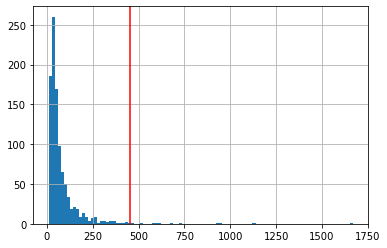

In [89]:
# https://likegeeks.com/matplotlib-tutorial/
df_churn['income'].hist(bins=100)
plt.axvline(x=U, ymin=0, ymax=250, c='red')
plt.show()

### Write a function to get a dataframe and drop outliers on numerical values!

In [100]:
# df_churn.dtypes

In [101]:
# for col in df_churn.columns:
#     if df_churn[col].dtypes == 'int64':
#         print(col)

In [98]:
def remove_outliers(df):
    '''Gets a dataframe and remove outliers from numerical fiels.'''
    for col in df.columns:
        if (df[col].dtypes == 'int64') | (df[col].dtypes == 'float64'):
            U = df[col].mean() + 3.5*df[col].std()
            L = df[col].mean() - 3.5*df[col].std()
            df = df[(df[col]<U) & (df[col]>L)]
    return df
        

In [99]:
remove_outliers(df_churn)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,confer,ebill,loglong,logtoll,logequi,logcard,logwire,lninc,custcat,churn
7,2,38,35,0,5,76,2,10,0,0,...,1,1,1.800058,3.806662,3.914021,3.146305,4.172848,4.330733,4,0
26,2,42,40,0,7,37,2,8,0,1,...,1,1,2.110213,3.157000,3.608212,3.332205,3.621671,3.610918,4,0
52,3,10,22,0,0,24,4,0,0,0,...,1,1,2.054124,3.167583,3.617652,3.113515,3.402863,3.178054,4,0
64,2,44,39,0,16,79,2,16,0,0,...,1,1,2.724580,3.198673,3.623007,3.305054,3.402863,4.369448,4,1
79,1,26,42,0,0,80,4,15,0,1,...,1,1,2.060514,3.784190,3.903991,2.351375,3.778492,4.382027,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,3,10,23,0,1,29,4,0,0,1,...,1,1,1.599388,3.465736,3.974998,3.576550,3.920983,3.367296,4,0
954,2,7,41,0,6,94,2,16,0,0,...,1,1,1.348073,3.332205,3.628333,2.197225,3.723281,4.543295,4,0
965,3,51,45,1,4,46,3,6,0,0,...,1,0,3.030134,3.548180,3.884652,3.473518,3.884652,3.828641,4,0
967,1,9,36,0,1,79,3,11,0,1,...,1,0,1.757858,3.323236,3.518980,3.425890,3.254243,4.369448,3,1


In [108]:
def remove_outliers_ver2(df):
    '''Gets a dataframe and remove outliers from numerical fiels.'''
    for col in df.columns:
        if (df[col].dtypes == 'int64') | (df[col].dtypes == 'float64'):
            U = df[col].mean() + 3.5*df[col].std()
            L = df[col].mean() - 3.5*df[col].std()
            outliers = df[(df[col]>U) | (df[col]<L)]
            df = df[~df.index.isin(outliers.index)]
    return df

In [109]:
remove_outliers_ver2(df_churn)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,confer,ebill,loglong,logtoll,logequi,logcard,logwire,lninc,custcat,churn
0,2,13,44,1,9,64,4,5,0,0,...,0,0,1.308333,NaN,NaN,2.014903,NaN,4.158883,1,1
1,3,11,33,1,7,136,5,5,0,0,...,1,0,1.481605,3.032546,NaN,2.724580,3.575151,4.912655,4,1
2,3,68,52,1,24,116,1,29,0,1,...,1,0,2.898671,2.890372,NaN,3.409496,NaN,4.753590,3,0
3,2,33,33,0,12,33,2,0,0,1,...,0,0,2.246015,NaN,NaN,NaN,NaN,3.496508,1,1
4,2,23,30,1,9,30,1,2,0,0,...,1,0,1.840550,NaN,NaN,NaN,NaN,3.401197,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,1,15,46,1,17,63,5,1,0,0,...,1,1,1.308333,2.803360,3.749504,NaN,3.499533,4.143135,4,1
995,3,10,39,0,0,27,3,0,0,1,...,0,1,1.098612,NaN,3.369018,NaN,NaN,3.295837,1,0
996,1,7,34,0,2,22,5,5,0,1,...,0,0,1.536867,NaN,3.242592,NaN,NaN,3.091042,1,0
998,3,70,49,0,18,87,2,22,0,1,...,1,0,3.242592,3.511545,NaN,3.228826,NaN,4.465908,3,0


### PCA

Keeping the variance is important to make sure data points are not hiding behind one another and we do not face data loss and get into trouble for categorization.

In [116]:
# Principal Component Analysis
from sklearn.decomposition import PCA


X = df_churn.drop('churn',axis=1)
X = X.fillna(0)
y = df_churn['churn']
pca_model = PCA(n_components=4) # if n_components = 0.88 that means take enough components that at least 88% of variance of data is explained.
pca_model.fit(X)
x_pca = pca_model.transform(X) # this step transforms all original features to fit in the new feature space of the PCA.
# x_pca = pca_model.fit_transform(X) # combination of two last steps in one step.
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3
0,-1092.053480,162.682754,-123.164728,-109.711642
1,-761.890812,283.915493,-339.780451,-190.202121
2,781.155372,-1692.125001,202.685580,-444.111220
3,-1044.973150,97.684525,-87.132861,106.909252
4,-1092.634242,159.280127,-127.996112,30.958393


In [119]:
pca_model.explained_variance_

array([1971931.36399825,  843370.69856566,  549403.59695565,
        250438.4020017 ])

In [120]:
pca_model.explained_variance_ratio_

array([0.51297944, 0.21939497, 0.14292219, 0.0651492 ])

In [121]:
pca_model.explained_variance_ratio_.sum()

0.9404458087983022

In [123]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler, RobustScaler


MMS = MinMaxScaler()
x_normal = MMS.fit_transform(X)
x_normal = pd.DataFrame(x_normal, columns=X.columns)
x_normal.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,forward,confer,ebill,loglong,logtoll,logequi,logcard,logwire,lninc,custcat
0,0.5,0.169014,0.440678,1.0,0.163636,0.033153,0.75,0.106383,0.0,0.0,...,1.0,0.0,0.0,0.300145,0.000000,0.0,0.429284,0.00000,0.375641,0.000000
1,1.0,0.140845,0.254237,1.0,0.127273,0.076552,1.00,0.106383,0.0,0.0,...,1.0,1.0,0.0,0.336933,0.588468,0.0,0.580483,0.75776,0.519983,1.000000
2,1.0,0.943662,0.576271,1.0,0.436364,0.064497,0.00,0.617021,0.0,1.0,...,0.0,1.0,0.0,0.637794,0.560879,0.0,0.726408,0.00000,0.489523,0.666667
3,0.5,0.450704,0.254237,0.0,0.218182,0.014467,0.25,0.000000,0.0,1.0,...,0.0,0.0,0.0,0.499227,0.000000,0.0,0.000000,0.00000,0.248802,0.000000
4,0.5,0.309859,0.203390,1.0,0.163636,0.012658,0.00,0.042553,0.0,0.0,...,1.0,1.0,0.0,0.413142,0.000000,0.0,0.000000,0.00000,0.230551,0.666667


In [124]:
from sklearn.preprocessing import LabelEncoder

In [126]:
le_region = LabelEncoder()
df_churn['region'] = le_region.fit_transform(df_churn['region'])
df_churn.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,confer,ebill,loglong,logtoll,logequi,logcard,logwire,lninc,custcat,churn
0,1,13,44,1,9,64,4,5,0,0,...,0,0,1.308333,NaN,NaN,2.014903,NaN,4.158883,1,1
1,2,11,33,1,7,136,5,5,0,0,...,1,0,1.481605,3.032546,NaN,2.724580,3.575151,4.912655,4,1
2,2,68,52,1,24,116,1,29,0,1,...,1,0,2.898671,2.890372,NaN,3.409496,NaN,4.753590,3,0
3,1,33,33,0,12,33,2,0,0,1,...,0,0,2.246015,NaN,NaN,NaN,NaN,3.496508,1,1
4,1,23,30,1,9,30,1,2,0,0,...,1,0,1.840550,NaN,NaN,NaN,NaN,3.401197,3,0


In [128]:
le_region.inverse_transform([0,1,2])

array([1, 2, 3], dtype=int64)

In [ ]:
def label_encoder(d):
    le = LabelEncoder()
    for c in d.columns:
        if d[c].dtypes == 'object':
            le.fit_transform(d[c])

#### For one hot encoding it is better to use pandas get_dummies()

In [132]:
# df_d = pd.get_dummies(df_churn, columns=['region', 'maincrop', 'claimtype'], dummy_na=True, drop_first=True)
# df_d.head()

In [131]:
df_churn.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'tollfree', 'equip', 'callcard',
       'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon', 'wiremon',
       'longten', 'tollten', 'equipten', 'cardten', 'wireten', 'multline',
       'voice', 'pager', 'internet', 'callid', 'callwait', 'forward', 'confer',
       'ebill', 'loglong', 'logtoll', 'logequi', 'logcard', 'logwire', 'lninc',
       'custcat', 'churn'],
      dtype='object')